###### Fifa Dataset Analysis

In [40]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from IPython.display import display

In [32]:
data = pd.read_csv('/Users/tonnymutumba/Desktop/players_20.csv')

##### Display of all columns in the dataset, print off just the column names

In [ ]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
display(data)

In [137]:
display(data.columns.tolist)

<bound method IndexOpsMixin.tolist of Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)>

In [138]:
print(data.columns.values)

['sofifa_id' 'player_url' 'short_name' 'long_name' 'age' 'dob' 'height_cm'
 'weight_kg' 'nationality' 'club' 'overall' 'potential' 'value_eur'
 'wage_eur' 'player_positions' 'preferred_foot' 'international_reputation'
 'weak_foot' 'skill_moves' 'work_rate' 'body_type' 'real_face'
 'release_clause_eur' 'player_tags' 'team_position' 'team_jersey_number'
 'loaned_from' 'joined' 'contract_valid_until' 'nation_position'
 'nation_jersey_number' 'pace' 'shooting' 'passing' 'dribbling'
 'defending' 'physic' 'gk_diving' 'gk_handling' 'gk_kicking' 'gk_reflexes'
 'gk_speed' 'gk_positioning' 'player_traits' 'attacking_crossing'
 'attacking_finishing' 'attacking_heading_accuracy'
 'attacking_short_passing' 'attacking_volleys' 'skill_dribbling'
 'skill_curve' 'skill_fk_accuracy' 'skill_long_passing'
 'skill_ball_control' 'movement_acceleration' 'movement_sprint_speed'
 'movement_agility' 'movement_reactions' 'movement_balance'
 'power_shot_power' 'power_jumping' 'power_stamina' 'power_strength'
 'po

In [35]:
data.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)

##### show number of rows and columns of this dataset. standard out using info() in pandas dataframes and series

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [24]:
len(data)

18278

In [26]:
len(data.columns)

104

In [27]:
data.shape

(18278, 104)

In [28]:
data.size

1900912

##### Show number of players and their countries, added club 

In [34]:
data[['short_name', 'nationality', 'club']]

,short_name,nationality,club
0,L. Messi,Argentina,FC Barcelona
1,Cristiano Ronaldo,Portugal,Juventus
2,Neymar Jr,Brazil,Paris Saint-Germain
3,J. Oblak,Slovenia,Atlético Madrid
4,E. Hazard,Belgium,Real Madrid
...,...,...,...
18273,Shao Shuai,China PR,Beijing Renhe FC
18274,Xiao Mingjie,China PR,Shanghai SIPG FC
18275,Zhang Wei,China PR,Hebei China Fortune FC
18276,Wang Haijian,China PR,Shanghai Greenland Shenhua FC


##### show only top10 countries and their number of players.
Using groupby(), counts(), value_counts(), head(), (nlargest() from panda series). 

In [12]:
data['nationality'].groupby(data['short_name']).value_counts().head(10)

short_name     nationality 
A. Abdallah    Comoros         1
A. Abdellaoui  Algeria         1
A. Abdennour   Tunisia         1
A. Abdi        Tunisia         1
A. Abdu        Saudi Arabia    1
A. Abedzadeh   Iran            1
A. Abeid       Mauritania      1
A. Aberkane    Netherlands     1
A. Ablet       China PR        1
A. Abqar       Morocco         1
Name: nationality, dtype: int64

In [26]:
data.groupby(by='nationality').count().head(10)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,club,overall,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
nationality,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Albania,43,43,43,43,43,43,43,43,43,43,...,40,40,40,40,40,40,40,40,40,40
Algeria,50,50,50,50,50,50,50,50,50,50,...,43,43,43,43,43,43,43,43,43,43
Angola,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
Antigua & Barbuda,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
Argentina,886,886,886,886,886,886,886,886,886,886,...,796,796,796,796,796,796,796,796,796,796
Armenia,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
Australia,196,196,196,196,196,196,196,196,196,196,...,171,171,171,171,171,171,171,171,171,171
Austria,319,319,319,319,319,319,319,319,319,319,...,272,272,272,272,272,272,272,272,272,272


In [120]:
w = data.groupby(by='nationality').count().nlargest(10, 'short_name')
display(w)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,club,overall,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
nationality,,,,,,,,,,,,,,,,,,,,,
England,1667,1667,1667,1667,1667,1667,1667,1667,1667,1667,...,1497,1497,1497,1497,1497,1497,1497,1497,1497,1497
Germany,1216,1216,1216,1216,1216,1216,1216,1216,1216,1216,...,1055,1055,1055,1055,1055,1055,1055,1055,1055,1055
Spain,1035,1035,1035,1035,1035,1035,1035,1035,1035,1035,...,922,922,922,922,922,922,922,922,922,922
France,984,984,984,984,984,984,984,984,984,984,...,881,881,881,881,881,881,881,881,881,881
Argentina,886,886,886,886,886,886,886,886,886,886,...,796,796,796,796,796,796,796,796,796,796
Brazil,824,824,824,824,824,824,824,824,824,824,...,751,751,751,751,751,751,751,751,751,751
Italy,732,732,732,732,732,732,732,732,732,732,...,630,630,630,630,630,630,630,630,630,630
Colombia,591,591,591,591,591,591,591,591,591,591,...,545,545,545,545,545,545,545,545,545,545
Japan,453,453,453,453,453,453,453,453,453,453,...,398,398,398,398,398,398,398,398,398,398


In [26]:
w[['short_name', 'club']] 

,short_name,club
nationality,,
England,1667,1667
Germany,1216,1216
Spain,1035,1035
France,984,984
Argentina,886,886
Brazil,824,824
Italy,732,732
Colombia,591,591
Japan,453,453


##### a bar plot of top 5 countries and their number of players

In [48]:
a = w[['short_name']].nlargest(5, "short_name")
print(a)

             short_name
nationality            
England            1667
Germany            1216
Spain              1035
France              984
Argentina           886


<AxesSubplot:title={'center':'Top 5 countries and their number of players'}, xlabel='Nationality', ylabel='sofifa_id'>

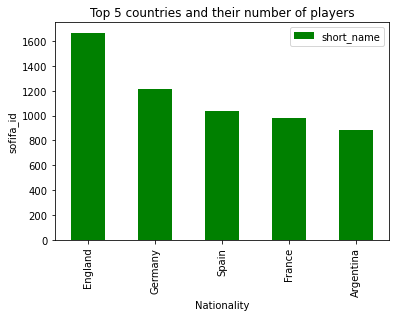

In [50]:
a.plot(kind='bar', title='Top 5 countries and their number of players', ylabel='sofifa_id', xlabel='Nationality', color='green')

##### Top 5 players short name and wages

In [87]:
data[['short_name', 'wage_eur']].value_counts().head(5)

short_name   wage_eur
J. García    1000        5
J. Williams  1000        4
M. López     1000        4
J. Brown     3000        4
J. Gómez     1000        3
dtype: int64

##### Top 5 players short name and wages that are getting highest salaries

In [92]:
top_salaries = data[['short_name', 'wage_eur']].sort_values("wage_eur").nlargest(5, 'wage_eur')
print(top_salaries)

           short_name  wage_eur
0            L. Messi    565000
4           E. Hazard    470000
1   Cristiano Ronaldo    405000
22       A. Griezmann    370000
5        K. De Bruyne    370000


<function matplotlib.pyplot.show(close=None, block=None)>

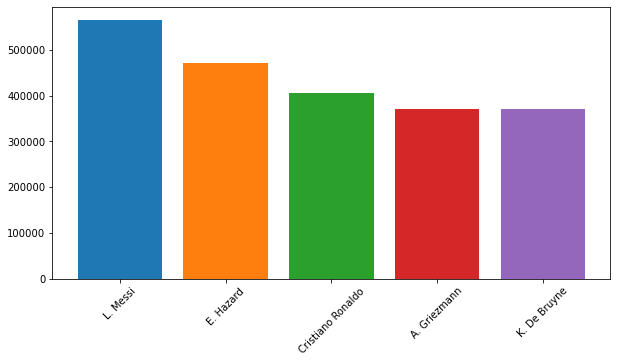

In [119]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
plt.bar(x=top_salaries['short_name'], height=top_salaries['wage_eur'], color=('tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple'))
plt.show

<AxesSubplot:title={'center':'5 Most paid Players'}, xlabel='short_name', ylabel='wage_eur'>

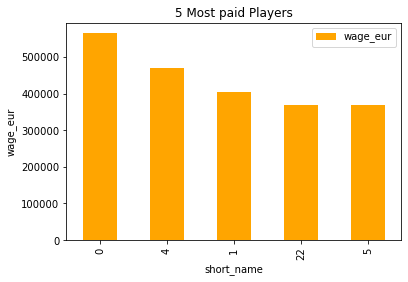

In [94]:
top_salaries.plot(kind='bar', title='5 Most paid Players', ylabel='wage_eur', xlabel='short_name', color='orange')

##### Germany Records 

In [7]:
Germany_records = data[data["nationality"]=='Germany']
Germany_records.head(10)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
6,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,27,1992-04-30,187,85,Germany,FC Barcelona,90,93,67500000,250000,GK,Right,3,4,1,Medium/Medium,Normal,Yes,143400000.0,NaN,GK,1.0,NaN,2014-07-01,2022.0,SUB,22.0,NaN,NaN,NaN,NaN,NaN,NaN,88.0,85.0,88.0,90.0,45.0,88.0,"Swerve Pass, Acrobatic Clearance, Flair Passes",18,14,11,61,14,21,18,12,63,30,38,50,37,86,43,66,79,35,78,10,43,22,11,70,25,70,25,13,10,88,85,88,88,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,33,1986-03-27,193,92,Germany,FC Bayern München,88,88,32000000,155000,GK,Right,5,4,1,Medium/Medium,Normal,Yes,52800000.0,NaN,GK,1.0,NaN,2011-07-01,2021.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,87.0,91.0,87.0,57.0,85.0,"Power Free-Kick, Flair, Swerve Pass, Acrobatic...",15,13,25,55,11,30,14,11,59,46,54,60,51,84,35,68,77,43,80,16,29,30,12,70,47,70,17,10,11,87,87,91,85,87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,182521,https://sofifa.com/player/182521/toni-kroos/20...,T. Kroos,Toni Kroos,29,1990-01-04,183,76,Germany,Real Madrid,88,88,57000000,330000,CM,Right,4,5,3,Medium/Medium,Normal,Yes,116900000.0,"#Playmaker , #Crosser, #Complete Midfielder",LCM,8.0,NaN,2014-07-17,2023.0,SUB,8.0,45.0,80.0,90.0,81.0,70.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,"Argues with Officials, Finesse Shot, Crowd Fav...",88,75,58,91,82,80,86,84,92,89,50,41,60,87,71,87,30,74,73,86,60,76,75,89,73,88,72,70,62,10,11,13,7,10,75+3,75+3,75+3,78+3,79+3,79+3,79+3,78+3,81+3,81+3,81+3,79+3,85+3,85+3,85+3,79+3,75+3,79+3,79+3,79+3,75+3,72+3,69+3,69+3,69+3,72+3
37,188350,https://sofifa.com/player/188350/marco-reus/20...,M. Reus,Marco Reus,30,1989-05-31,180,71,Germany,Borussia Dortmund,88,88,56000000,170000,"CAM, LM, ST",Right,4,4,4,High/Medium,Lean,Yes,92400000.0,"#Dribbler, #Playmaker , #Distance Shooter, #F...",CAM,11.0,NaN,2012-07-01,2023.0,ST,11.0,85.0,88.0,84.0,87.0,45.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Avoids Using Weaker Foot, Bea...",82,87,49,86,90,87,89,86,77,88,85,85,86,87,84,88,71,76,67,87,51,48,89,86,90,85,49,37,45,12,12,13,13,11,82+3,82+3,82+3,86+3,86+3,86+3,86+3,86+3,86+3,86+3,86+3,85+3,80+3,80+3,80+3,85+3,69+3,65+3,65+3,65+3,69+3,64+3,55+3,55+3,55+3,64+3
49,178603,https://sofifa.com/player/178603/mats-hummels/...,M. Hummels,Mats Hummels,30,1988-12-16,191,94,Germany,Borussia Dortmund,87,87,41000000,130000,CB,Right,4,3,3,High/Medium,Normal,Yes,67700000.0,"#Tackling , #Tactician",LCB,15.0,NaN,2019-07-01,2022.0,NaN,NaN,51.0,58.0,76.0,72.0,89.0,76.0,NaN,NaN,NaN,NaN,NaN,NaN,"Avoids Using Weaker Foot, Leadership, Finesse ...",6

In [19]:
Germany_records.sort_values(by=['height_cm', 'weight_kg', 'wage_eur']).nlargest(5, ['height_cm', 'weight_kg','wage_eur'])

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
8016,236831,https://sofifa.com/player/236831/aaron-seydel/...,A. Seydel,Aaron Seydel,23,1996-02-07,199,90,Germany,1. FSV Mainz 05,67,73,1100000,9000,"ST, LM",Left,1,4,3,Medium/Low,Normal,No,2000000.0,NaN,SUB,36.0,NaN,2016-11-27,2021.0,NaN,NaN,68.0,64.0,53.0,66.0,29.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Crowd Favourite",59,68,69,58,59,69,43,31,35,72,67,69,53,58,34,66,63,51,78,56,55,19,63,59,55,68,25,28,22,12,9,14,11,9,66+2,66+2,66+2,64+2,65+2,65+2,65+2,64+2,62+2,62+2,62+2,62+2,54+2,54+2,54+2,62+2,46+2,43+2,43+2,43+2,46+2,44+2,43+2,43+2,43+2,44+2
1389,199833,https://sofifa.com/player/199833/lars-unnersta...,L. Unnerstall,Lars Unnerstall,28,1990-07-20,198,103,Germany,PSV,76,78,6500000,14000,GK,Right,1,1,1,Medium/Medium,Stocky,No,9600000.0,NaN,SUB,13.0,NaN,2018-07-01,2021.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.0,75.0,72.0,77.0,33.0,74.0,NaN,10,13,10,26,15,16,13,11,24,19,28,37,19,72,20,54,40,35,82,12,36,21,13,42,16,58,11,17,15,76,75,72,74,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1217,200212,https://sofifa.com/player/200212/michael-esser...,M. Esser,Michael Esser,31,1987-11-22,198,97,Germany,Hannover 96,77,77,5500000,23000,GK,Right,1,3,1,Medium/Medium,Normal,Yes,8800000.0,NaN,SUB,23.0,NaN,2017-07-01,2020.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.0,74.0,64.0,82.0,41.0,75.0,Flair,10,8,25,39,9,15,14,17,35,17,32,48,30,72,28,48,67,37,82,19,40,30,6,48,23,53,20,15,16,77,74,64,75,82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13576,239746,https://sofifa.com/player/239746/lukas-watkowi...,L. Watkowiak,Lukas Watkowiak,23,1996-03-06,197,103,Germany,SV Wehen Wiesbaden,62,68,325000,2000,GK,Right,1,3,1,Medium/Medium,Stocky,No,569000.0,NaN,GK,1.0,NaN,2017-07-01,2021.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,59.0,57.0,66.0,22.0,63.0,NaN,13,7,13,19,5,10,11,12,25,18,20,23,18,54,19,43,27,26,83,8,32,6,6,32,15,21,7,13,13,59,59,57,63,66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
518,179783,https://sofifa.com/player/179783/ralf-fahrmann...,R. Fährmann,Ralf Fährmann,30,1988-09-27,197,98,Germany,Norwich City,80,80,10000000,43000,GK,Right,2,1,1,Medium/Medium,Normal,Yes,NaN,NaN,SUB,21.0,FC Schalke 04,NaN,2020.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.0,79.0,44.0,84.0,43.0,79.0,"Giant Throw-in, Acrobatic Clearance, Flair Passes",14,11,15,25,11,15,18,11,26,24,38,47,39,81,36,33,72,32,79,9,36,23,11,42,21,61,10,12,10,82,79,44,79,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
Germany_records[['short_name', 'wage_eur']].nlargest(5, 'wage_eur') 

,short_name,wage_eur
36,T. Kroos,330000
6,M. ter Stegen,250000
55,L. Sané,195000
146,I. Gündoğan,180000
37,M. Reus,170000


In [29]:
Germany_records[['short_name', 'shooting']].sort_values(by=['shooting']).nlargest(5, 'shooting')

,short_name,shooting
37,M. Reus,88.0
276,K. Volland,84.0
217,M. Kruse,83.0
70,T. Müller,83.0
120,S. Gnabry,82.0


##### Top 5 players records with awesome defending skills

In [31]:
data[['short_name', 'defending', 'nationality', 'club']].sort_values(by=['defending']).nlargest(5, 'defending')

,short_name,defending,nationality,club
7,V. van Dijk,90.0,Netherlands,Liverpool
16,G. Chiellini,90.0,Italy,Juventus
35,D. Godín,89.0,Uruguay,Inter
49,M. Hummels,89.0,Germany,Borussia Dortmund
11,K. Koulibaly,89.0,Senegal,Napoli


##### Wages records of top 5 players of 'Real Madrid' team 

In [37]:
wages_records = data[data["club"]=='Real Madrid']
wages_records.sort_values('wage_eur').nlargest(5, 'wage_eur')

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,2024.0,LF,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
8,177003,https://sofifa.com/player/177003/luka-modric/2...,L. Modrić,Luka Modrić,33,1985-09-09,172,66,Croatia,Real Madrid,90,90,45000000,340000,CM,Right,4,4,4,High/High,Lean,Yes,92300000.0,"#Dribbler, #Playmaker , #Crosser, #Acrobat, #...",RCM,10.0,NaN,2012-08-01,2020.0,NaN,NaN,74.0,76.0,89.0,89.0,72.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Argues with Officials, Finesse Shot, Speed Dri...",86,72,55,92,76,87,85,78,88,92,77,71,92,89,93,79,68,85,58,82,62,82,79,91,82,92,68,76,71,13,9,7,14,9,77+3,77+3,77+3,84+3,83+3,83+3,83+3,84+3,86+3,86+3,86+3,85+3,87+3,87+3,87+3,85+3,81+3,81+3,81+3,81+3,81+3,79+3,72+3,72+3,72+3,79+3
36,182521,https://sofifa.com/player/182521/toni-kroos/20...,T. Kroos,Toni Kroos,29,1990-01-04,183,76,Germany,Real Madrid,88,88,57000000,330000,CM,Right,4,5,3,Medium/Medium,Normal,Yes,116900000.0,"#Playmaker , #Crosser, #Complete Midfielder",LCM,8.0,NaN,2014-07-17,2023.0,SUB,8.0,45.0,80.0,90.0,81.0,70.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,"Argues with Officials, Finesse Shot, Crowd Fav...",88,75,58,91,82,80,86,84,92,89,50,41,60,87,71,87,30,74,73,86,60,76,75,89,73,88,72,70,62,10,11,13,7,10,75+3,75+3,75+3,78+3,79+3,79+3,79+3,78+3,81+3,81+3,81+3,79+3,85+3,85+3,85+3,79+3,75+3,79+3,79+3,79+3,75+3,72+3,69+3,69+3,69+3,72+3
18,155862,https://sofifa.com/player/155862/sergio-ramos-...,Sergio Ramos,Sergio Ramos García,33,1986-03-30,184,82,Spain,Real Madrid,89,89,31500000,300000,CB,Right,4,3,3,High/Medium,Normal,Yes,64600000.0,"#Aerial Threat, #Tackling , #Tactician , #Comp...",LCB,4.0,NaN,2005-08-01,2020.0,RCB,15.0,72.0,68.0,75.0,73.0,87.0,85.0,NaN,NaN,NaN,NaN,NaN,NaN,"Injury Prone, Avoids Using Weaker Foot, Leader...",66,63,92,80,69,65,74,72,83,83,74,71,78,87,66,79,93,80,85,62,90,88,67,71,86,84,85,87,90,11,8,9,7,11,74+3,74+3,74+3,72+3,73+3,73+3,73+3,72+3,74+3,74+3,74+3,73+3,78+3,78+3,78+3,73+3,80+3,84+3,84+3,84+3,80+3,82+3,87+3,87+3,87+3,82+3
46,165153,https://sofifa.com/player/165153/karim-benzema...,K. Benzema,Karim Benzema,31,1987-12-19,185,81,France,Real Madrid,87,87,45000000,285000,"CF, ST",Right,4,4,4,Medium/Low,Normal,Yes,92300000.0,NaN,CF,9.0,NaN,2009-07-09,2021.0,NaN,NaN,76.0,82.0,80.0,86.0,39.0,77.0,Na

##### Shooting records of top 5 players of 'Real Madrid' team 

In [39]:
shooting_records = data[data["club"]=='Real Madrid']
shooting_records.sort_values('shooting').nlargest(5, 'shooting')

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
100,173731,https://sofifa.com/player/173731/gareth-bale/2...,G. Bale,Gareth Frank Bale,29,1989-07-16,185,82,Wales,Real Madrid,85,85,37500000,250000,"RW, LW, ST",Left,4,3,4,Medium/Medium,Lean,Yes,76900000.0,"#Speedster, #Distance Shooter, #Crosser, #FK S...",SUB,11.0,NaN,2013-09-02,2022.0,RM,11.0,91.0,87.0,82.0,82.0,58.0,76.0,NaN,NaN,NaN,NaN,NaN,NaN,"Inflexible, Power Free-Kick, Argues with Offic...",86,84,84,81,85,83,90,87,80,84,90,91,79,80,65,92,86,73,80,90,65,59,85,79,76,85,54,55,52,15,15,11,5,6,84+3,84+3,84+3,84+3,84+3,84+3,84+3,84+3,82+3,82+3,82+3,83+3,78+3,78+3,78+3,83+3,72+3,69+3,69+3,69+3,72+3,70+3,66+3,66+3,66+3,70+3
106,198710,https://sofifa.com/player/198710/james-rodrigu...,J. Rodríguez,James David Rodríguez Rubio,27,1991-07-12,180,75,Colombia,Real Madrid,85,85,40500000,225000,"CAM, CM, RM",Left,4,2,4,Medium/Medium,Normal,Yes,83000000.0,"#Playmaker , #Distance Shooter, #Crosser, #FK...",SUB,16.0,NaN,2014-07-22,2020.0,CAM,10.0,55.0,86.0,87.0,86.0,50.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN,"Selfish, Finesse Shot, Speed Dribbler (CPU AI ...",90,83,62,86,90,85,89,86,83,90,57,54,80,84,76,86,46,65,64,92,60,55,80,86,81,87,52,41,44,15,15,15,5,14,78+3,78+3,78+3,81+3,81+3,81+3,81+3,81+3,83+3,83+3,83+3,80+3,80+3,80+3,80+3,80+3,67+3,67+3,67+3,67+3,67+3,62+3,57+3,57+3,57+3,62+3
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,2024.0,LF,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
161,232432,https://sofifa.com/player/232432/luka-jovic/20...,L. Jović,Luka Jović,21,1997-12-23,182,85,Serbia,Real Madrid,83,89,36500000,155000,ST,Right,1,5,3,Medium/Medium,Stocky,Yes,82100000.0,#Poacher,SUB,18.0,NaN,2019-07-01,2024.0,NaN,NaN,77.0,82.0,68.0,81.0,29.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,"Speed Dribbler (CPU AI Only), Outside Foot Shot",67,86,79,74,84,81,77,46,58,83,76,77,78,83,77,83,75,76,78,76,62,23,84,70,66,79,25,26,16,8,7,12,9,13,81+2,81+2,81+2,78+2,80+2,80+2,80+2,78+2,77+2,77+2,77+2,77+2,69+2,69+2,69+2,77+2,55+2,53+2,53+2,53+2,55+2,51+2,47+2,47+2,47+2,51+2
46,165153,https://sofifa.com/player/165153/karim-benzema...,K. Benzema,Karim Benzema,31,1987-12-19,185,81,France,Real Madrid,87,87,45000000,285000,"CF, ST",Right,4,4,4,Medium/Low,Normal,Yes,92300000.0,NaN,CF,9.0,NaN,2009-07-09,2021.0,NaN,NaN,76.0,82.0,80.0,86.0,39.0,77.

##### defending records of top 5 players of 'Real Madrid' team

In [40]:
defending_records = data[data["club"]=='Real Madrid']
defending_records.sort_values('defending').nlargest(5, 'defending')

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
18,155862,https://sofifa.com/player/155862/sergio-ramos-...,Sergio Ramos,Sergio Ramos García,33,1986-03-30,184,82,Spain,Real Madrid,89,89,31500000,300000,CB,Right,4,3,3,High/Medium,Normal,Yes,64600000.0,"#Aerial Threat, #Tackling , #Tactician , #Comp...",LCB,4.0,NaN,2005-08-01,2020.0,RCB,15.0,72.0,68.0,75.0,73.0,87.0,85.0,NaN,NaN,NaN,NaN,NaN,NaN,"Injury Prone, Avoids Using Weaker Foot, Leader...",66,63,92,80,69,65,74,72,83,83,74,71,78,87,66,79,93,80,85,62,90,88,67,71,86,84,85,87,90,11,8,9,7,11,74+3,74+3,74+3,72+3,73+3,73+3,73+3,72+3,74+3,74+3,74+3,73+3,78+3,78+3,78+3,73+3,80+3,84+3,84+3,84+3,80+3,82+3,87+3,87+3,87+3,82+3
76,201535,https://sofifa.com/player/201535/raphael-varan...,R. Varane,Raphaël Varane,26,1993-04-25,191,81,France,Real Madrid,85,90,45000000,205000,CB,Right,3,3,2,Medium/High,Lean,Yes,95600000.0,#Tackling,RCB,5.0,NaN,2011-07-01,2022.0,RCB,4.0,83.0,45.0,62.0,63.0,85.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,40,83,75,42,55,46,52,76,77,79,86,63,83,38,52,79,72,86,53,77,82,44,59,43,84,87,86,85,11,11,9,5,14,62+3,62+3,62+3,61+3,62+3,62+3,62+3,61+3,64+3,64+3,64+3,64+3,69+3,69+3,69+3,64+3,74+3,79+3,79+3,79+3,74+3,77+3,83+3,83+3,83+3,77+3
42,200145,https://sofifa.com/player/200145/carlos-henriq...,Casemiro,Carlos Henrique Venancio Casimiro,27,1992-02-23,185,84,Brazil,Real Madrid,87,89,53500000,240000,CDM,Right,3,3,2,Medium/High,Normal,Yes,113700000.0,"#Tackling , #Tactician , #Strength, #Complete ...",CDM,14.0,NaN,2013-07-11,2021.0,NaN,NaN,62.0,72.0,75.0,72.0,85.0,89.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Injury Prone, Argues with Offic...",58,64,76,83,61,69,63,74,82,78,58,66,62,86,66,86,87,88,90,81,89,86,69,77,66,84,84,87,86,13,14,16,12,12,74+3,74+3,74+3,71+3,74+3,74+3,74+3,71+3,74+3,74+3,74+3,72+3,79+3,79+3,79+3,72+3,78+3,84+3,84+3,84+3,78+3,79+3,84+3,84+3,84+3,79+3
94,204963,https://sofifa.com/player/204963/daniel-carvaj...,Carvajal,Daniel Carvajal Ramos,27,1992-01-11,173,73,Spain,Real Madrid,85,86,38000000,205000,RB,Right,3,3,3,High/High,Stocky,Yes,80800000.0,#Engine,RB,2.0,NaN,2013-07-05,2022.0,RB,2.0,81.0,47.0,78.0,81.0,82.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84,41,70,83,34,78,74,47,74,84,79,83,80,84,82,68,77,90,74,36,84,83,75,74,45,82,83,83,85,13,13,15,9,15,68+3,68+3,68+3,74+3,73+3,73+3,73+3,74+3,74+3,74+3,74+3,78+3,77+3,77+3,77+3,78+3,83+3,82+3,82+3,82+3,83+3,83+3,80+3,80+3,80+3,83+3
332,240130,https://sofifa.com/player/240130/eder-gabriel-...,Éder Militão,Éder Gabriel Militão,21,1998-01-18,186,78,Brazil,Real Madrid,81,88,23000000,105000,"CB, RB",Right,1,2,2,Medium/High,Lean,No,51800000.0,NaN,SUB,3.0,NaN,2019-07-01,2025.0,NaN,NaN,79.0,50.0,66.0,71.0,81.0,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72,48,77,69,34,70,60,40,68,71,78,80,69,81,67,62,86,88,77,42,83,82,64,59,60,74,81,82,80,11,8,15

##### nationality records of top 5 players of 'Real Madrid' team

In [43]:
nationality_records = data[data["club"]=='Real Madrid']
nationality_records.sort_values('nationality').head(5)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,2024.0,LF,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
28,192119,https://sofifa.com/player/192119/thibaut-court...,T. Courtois,Thibaut Courtois,27,1992-05-11,199,96,Belgium,Real Madrid,88,89,48000000,235000,GK,Left,4,2,1,Medium/Medium,Courtois,Yes,102000000.0,NaN,GK,13.0,NaN,2018-08-09,2024.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,85.0,89.0,72.0,87.0,49.0,85.0,"Flair, Acrobatic Clearance",14,14,13,33,12,13,19,20,35,23,46,52,61,83,45,54,68,38,70,17,23,15,13,44,27,66,20,18,16,85,89,72,85,87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1256,243812,https://sofifa.com/player/243812/rodrygo-silva...,Rodrygo,Rodrygo Silva de Goes,18,2001-01-09,174,64,Brazil,Real Madrid,76,89,14000000,47000,"LW, RW, ST",Right,1,3,4,Medium/Medium,Lean,No,37500000.0,NaN,RES,27.0,NaN,2019-07-01,2025.0,NaN,NaN,85.0,72.0,65.0,80.0,29.0,57.0,NaN,NaN,NaN,NaN,NaN,NaN,"Selfish, Crowd Favourite",70,74,62,67,67,81,72,73,45,76,86,84,87,77,84,71,73,82,44,70,54,21,80,68,65,81,25,28,24,9,8,12,8,5,73+2,73+2,73+2,76+2,75+2,75+2,75+2,76+2,73+2,73+2,73+2,74+2,65+2,65+2,65+2,74+2,56+2,48+2,48+2,48+2,56+2,52+2,41+2,41+2,41+2,52+2
332,240130,https://sofifa.com/player/240130/eder-gabriel-...,Éder Militão,Éder Gabriel Militão,21,1998-01-18,186,78,Brazil,Real Madrid,81,88,23000000,105000,"CB, RB",Right,1,2,2,Medium/High,Lean,No,51800000.0,NaN,SUB,3.0,NaN,2019-07-01,2025.0,NaN,NaN,79.0,50.0,66.0,71.0,81.0,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72,48,77,69,34,70,60,40,68,71,78,80,69,81,67,62,86,88,77,42,83,82,64,59,60,74,81,82,80,11,8,15,12,15,65+2,65+2,65+2,67+2,66+2,66+2,66+2,67+2,66+2,66+2,66+2,70+2,69+2,69+2,69+2,70+2,78+2,76+2,76+2,76+2,78+2,78+2,79+2,79+2,79+2,78+2
2286,209749,https://sofifa.com/player/209749/lucas-silva-b...,Lucas Silva,Lucas Silva Borges,26,1993-02-16,182,80,Brazil,Real Madrid,74,77,6500000,88000,"CDM, CM",Right,1,3,3,Medium/Medium,Normal,No,13800000.0,NaN,RES,29.0,NaN,2015-01-26,2020.0,NaN,NaN,59.0,62.0,68.0,71.0,71.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,"Leadership, Argues with Officials",61,52,64,74,50,71,56,51,72,75,56,61,64,73,62,76,71,75,74,73,72,71,65,71,64,72,70,74,72,11,7,10,14,7,66+2,66+2,66+2,66+2,68+2,68+2,68+2,66+2,69+2,69+2,69

# PCA - principal component analysis 

WHY - Because this dataset is too large and for the purpose of exploring and analysis it all we need to use PCA

Convert the data into numpy array

In [46]:
x = data.values 

In [63]:
x = x[' '].str.replace(',', ".", ':').astype(float)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [56]:
x = scale(x)

ValueError: could not convert string to float: 'https://sofifa.com/player/158023/lionel-messi/20/159586'